<a href="https://colab.research.google.com/github/Brijesh1220/Face-Mask-Detection/blob/main/Covid_19_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid 19 Face Mask Detection**

## **Importing the Libraries**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## **Connecting Kaggle with Google Colaboratory**

In [ ]:
import os
os.environ['KAGGLE_USERNAME']= 'kshitijpandey22'
os.environ['KAGGLE_KEY']= 'b6086616175ca01d8a9755e9a59389b0'

## **Downloading the Dataset**

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## **Unzipping the Dataset**

In [ ]:
!unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Mapping variables to the Directories**

In [ ]:
main_dir='/content/New Masks Dataset'
test_dir=os.path.join(main_dir,'Test')
train_dir=os.path.join(main_dir,'Train')
valid_dir=os.path.join(main_dir,'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

## **Assigning all the file names of mask images to the list**

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

['0042.jpg', '1110.jpg', '1154.jpg', '0466.jpg', '1291.jpg', '1378.jpg', '0792.jpg', '1339.jpg', '0171.jpg', '0803.jpg']


## **Assigning all the file names of no mask images to the list**

In [ ]:
train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['102.jpg', '232.jpg', '247.jpg', '300.jpg', '154.jpg', '92.jpg', '203.jpg', '111.jpg', '317.jpg', '176.jpg']


## **Creates a grid of 4*4(16 images) where 8 will be of mask and 8 will be of no mask**

In [ ]:
nrows = 4
ncols = 4
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## **Created an empty list 'mask_pic' which will store paths of 8 images with mask**

In [ ]:
mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))
print(mask_pic)  


['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']


## **Created an empty list 'nomask_pic' which will store paths of 8 images with nomask**

In [ ]:
nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))
print(nomask_pic)


['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/154.jpg', '/content/New Masks Dataset/Train/Non Mask/92.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg', '/content/New Masks Dataset/Train/Non Mask/111.jpg']


## **Create a new list which combine both lists created before**

In [ ]:
merged_list = mask_pic + nomask_pic
print(merged_list)

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg', '/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/154.jpg', '/content/New Masks Dataset/Train/Non Mask/92.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg', '/content/New Masks Dataset/Train/Non Mask/111.jpg']


## **Displaying the 4*4 grid**

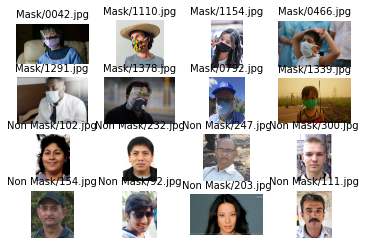

In [ ]:
for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.imshow(image, cmap = 'gray')
  sp.set_title(data, fontsize = 10)
  
plt.show()



## **Image/Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, rotation_range = 40, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150,150), batch_size=32, class_mode='binary')
valid_generator = validation_datagen.flow_from_directory(valid_dir, target_size = (150,150), batch_size=32, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

## **Building the CNN(Convolutional Neural Network) Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding = 'SAME', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

## **Compiling the CNN Model**

In [ ]:
model.compile(Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

## **Training and Validating the CNN Model**

In [ ]:
history=model.fit(train_generator, epochs=30, validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 15s 628ms/step - loss: 2.3965 - accuracy: 0.5350 - val_loss: 0.6908 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 11s 610ms/step - loss: 0.5211 - accuracy: 0.7667 - val_loss: 0.5378 - val_accuracy: 0.7255
Epoch 3/30
19/19 [==============================] - 11s 611ms/step - loss: 0.3567 - accuracy: 0.8600 - val_loss: 0.4827 - val_accuracy: 0.8595
Epoch 4/30
19/19 [==============================] - 11s 609ms/step - loss: 0.2796 - accuracy: 0.9033 - val_loss: 0.3353 - val_accuracy: 0.8987
Epoch 5/30
19/19 [==============================] - 11s 604ms/step - loss: 0.2884 - accuracy: 0.9033 - val_loss: 0.4262 - val_accuracy: 0.8856
Epoch 6/30
19/19 [==============================] - 11s 614ms/step - loss: 0.2529 - accuracy: 0.9167 - val_loss: 0.3655 - val_accuracy: 0.8889
Epoch 7/30
19/19 [==============================] - 11s 615ms/step - loss: 0.2395 - accuracy: 0.9133 - val_loss: 0.3259 - val_accuracy: 0.8922

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## **Plotting the graph of Training loss and Validation loss**

Text(0.5, 0, 'epoch')

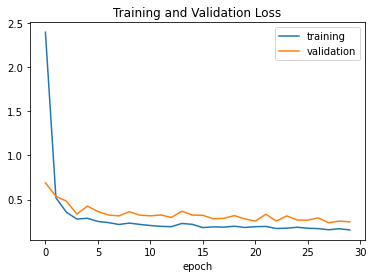

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

## **Plotting the graph of Training accuracy and Validation accuracy**

Text(0.5, 0, 'epochs')

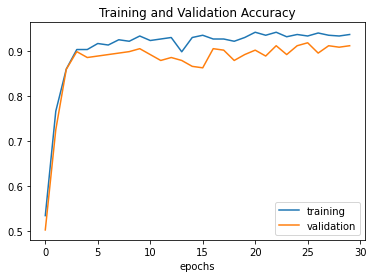

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')

## **Calculating the loss and accuracy for Test Dataset**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss:{} test_acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 308ms/step - loss: 0.2071 - accuracy: 0.9200
test_loss:0.2071123570203781 test_acc:0.9200000166893005


## **Uploading the image files from local machine for model to predict on static images. O for Mask and 1 for No Mask**

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path, target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images, axis=0)
  prediction=model.predict(images)
  print(fname)
  if prediction == 0:
    print('Mask')
  else:
    print('No Mask')

Saving 1625429905161.jpg to 1625429905161.jpg
1625429905161.jpg
No Mask


## **Saving the Model for future scope(OpenCV: Prediction on video streams)**

In [ ]:
model.save('model.h5')